In the following models, we will optimise on Crossentropy loss rather than F1 score, this is something we can consider later.

# Wavelet Transform Based CNN

Here, I will consider a state-of the art wavelet transform method for QRS complex detection, and attempt to implement this as a CNN mododel.

I will gradually alter different parameters of the model, the results of which will be collated and stored automatically as I go on.

Once this is completed, I will consider a Vanilla CNN, and compare results to the best of the above models

In [1]:
import base_wavelet_model
from importlib import reload
reload(base_wavelet_model)
import novel_activations
reload(novel_activations)
from hypothesis_tests import HypothesisTest

In [3]:
base_config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 8,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (2,1),
    "dilations" : None,
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": True,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/003-model\assets


===== Fold 004 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/004-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/004-model\assets


===== Fold 005 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/005-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/005-model\assets


===== Fold 006 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/006-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Custom Activation/models/006-model\assets


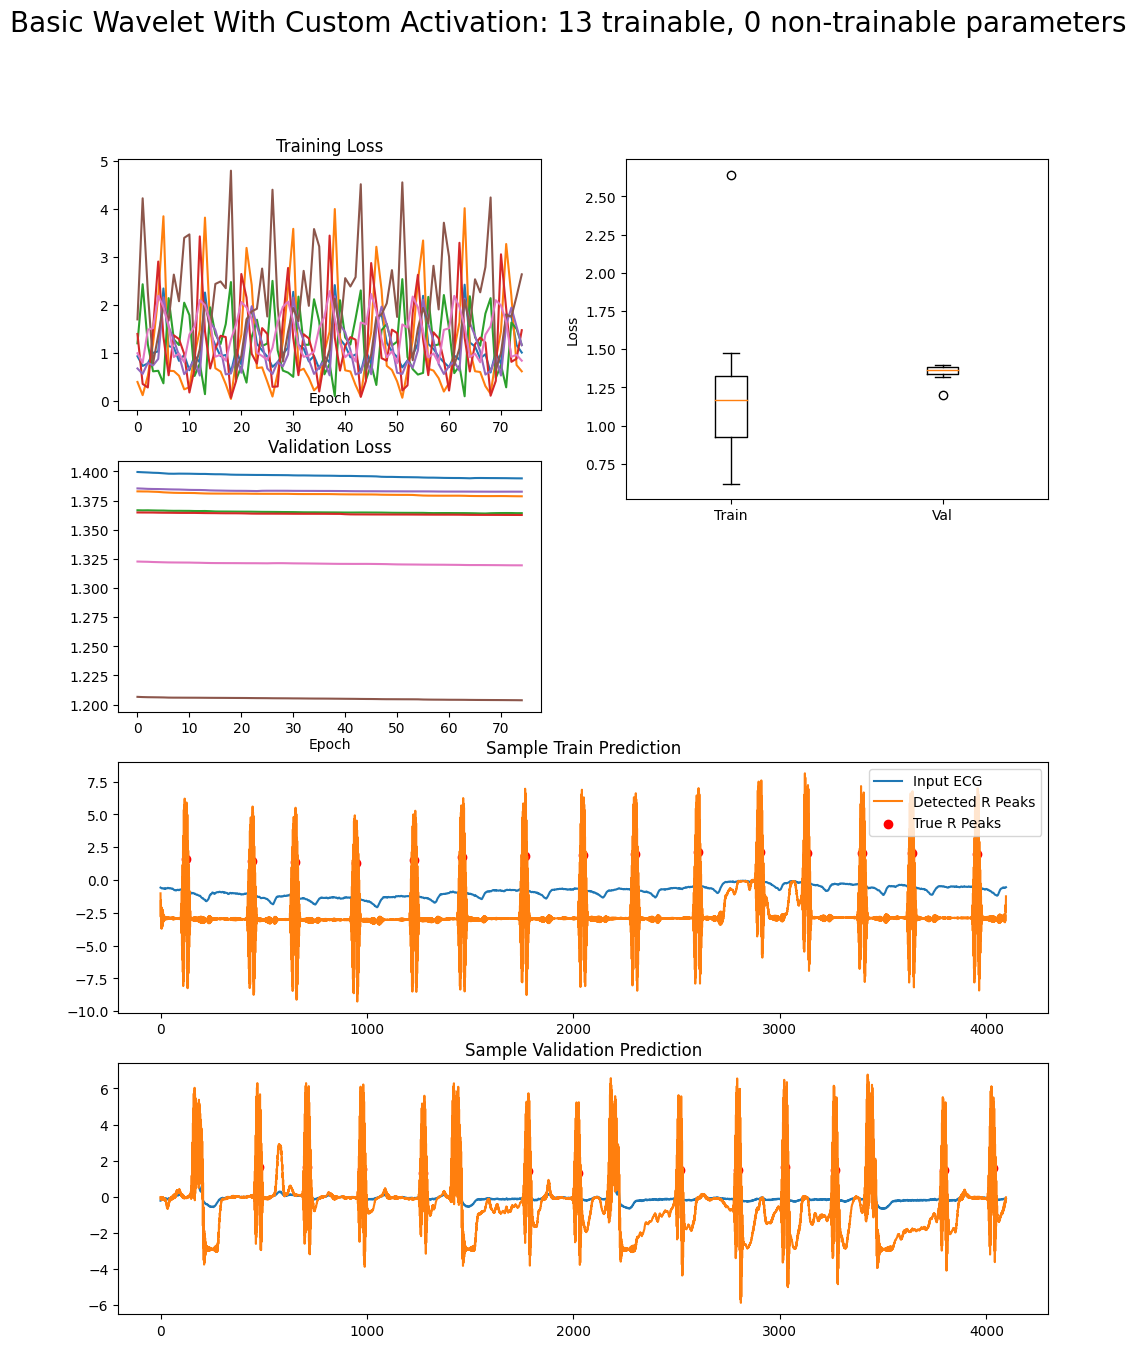

In [4]:
config_dict = base_config_dict.copy()
config_dict["exp_name"] = "Basic Wavelet With Custom Activation"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""

config_dict["trainKernels"]=True
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/003-model\assets


===== Fold 004 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/004-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/004-model\assets


===== Fold 005 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/005-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/005-model\assets


===== Fold 006 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/006-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With RELU Activation/models/006-model\assets


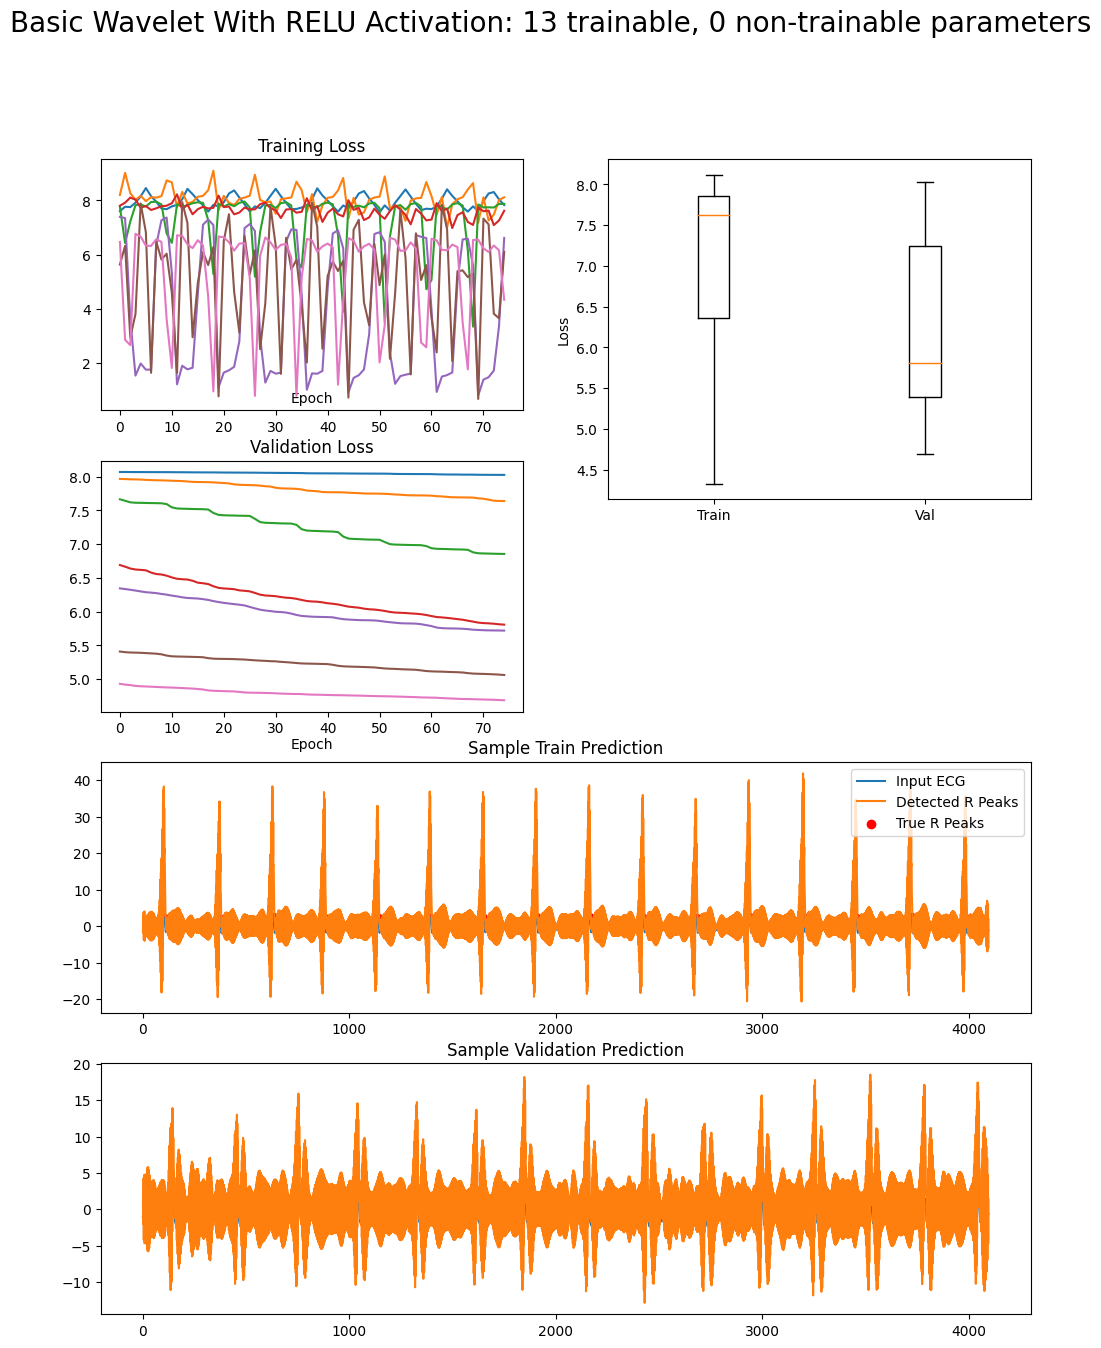

In [7]:
config_dict = base_config_dict.copy()
config_dict["exp_name"] = "Basic Wavelet With RELU Activation"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the RELU activation"""

config_dict["trainKernels"]=True
config_dict["activationLayer"]=novel_activations.BiasRelu
config_dict["activationLayerParams"]=[0.5, True]
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/003-model\assets


===== Fold 004 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/004-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/004-model\assets


===== Fold 005 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/005-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/005-model\assets


===== Fold 006 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/006-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Dilations/models/006-model\assets


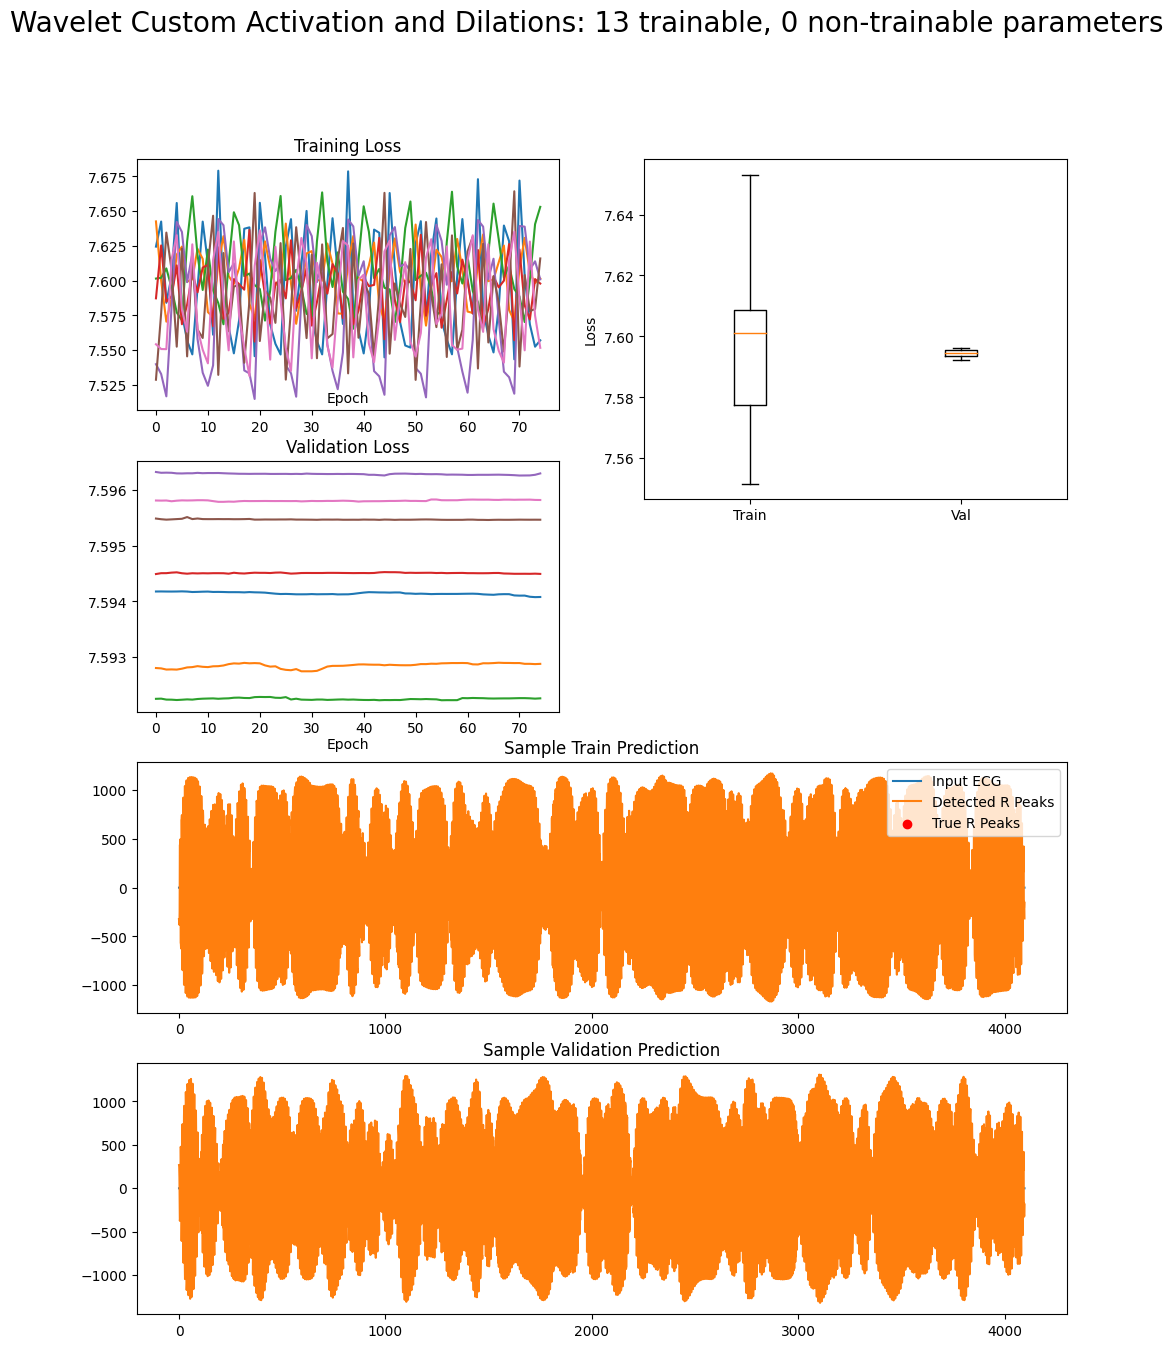

In [8]:
config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 8,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (1,1),
    "dilations" : (4,1),
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": True,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}
config_dict["exp_name"] = "Wavelet Custom Activation and Dilations"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/003-model\assets


===== Fold 004 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/004-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/004-model\assets


===== Fold 005 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/005-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/005-model\assets


===== Fold 006 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/006-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and 8 Dilations/models/006-model\assets


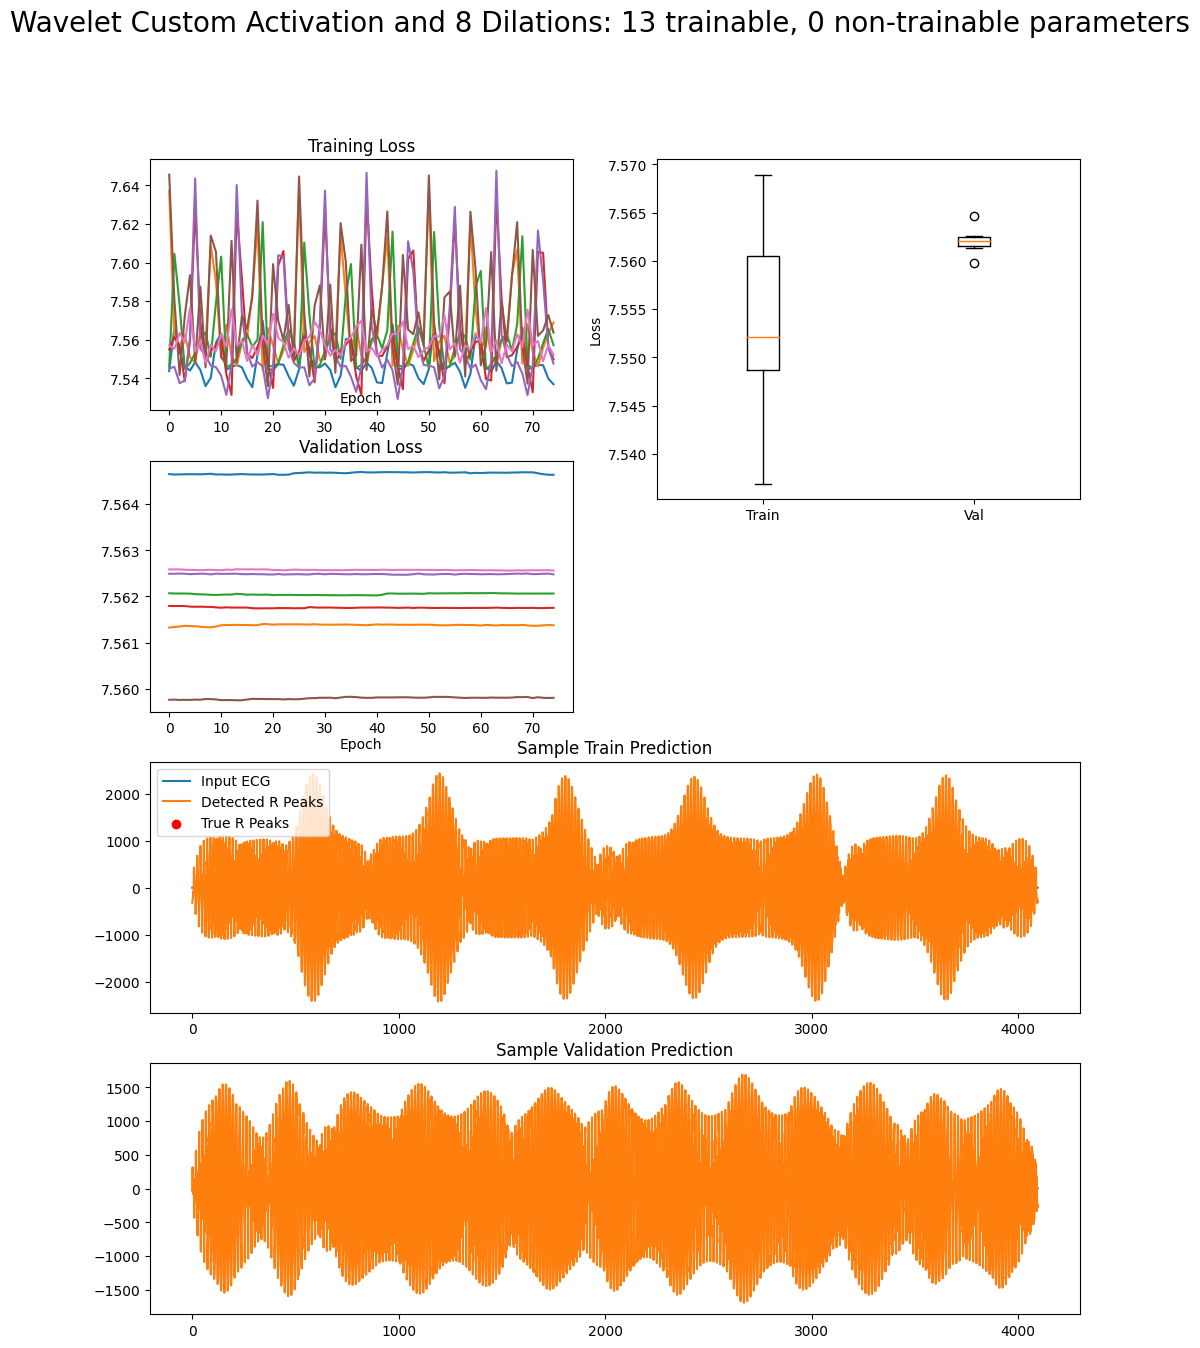

In [9]:
config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 8,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (1,1),
    "dilations" : (8,1),
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": True,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}
config_dict["exp_name"] = "Wavelet Custom Activation and 8 Dilations"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/003-model\assets


===== Fold 004 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/004-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/004-model\assets


===== Fold 005 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/005-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/005-model\assets


===== Fold 006 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/006-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Wavelet Custom Activation and Batch Size 1/models/006-model\assets


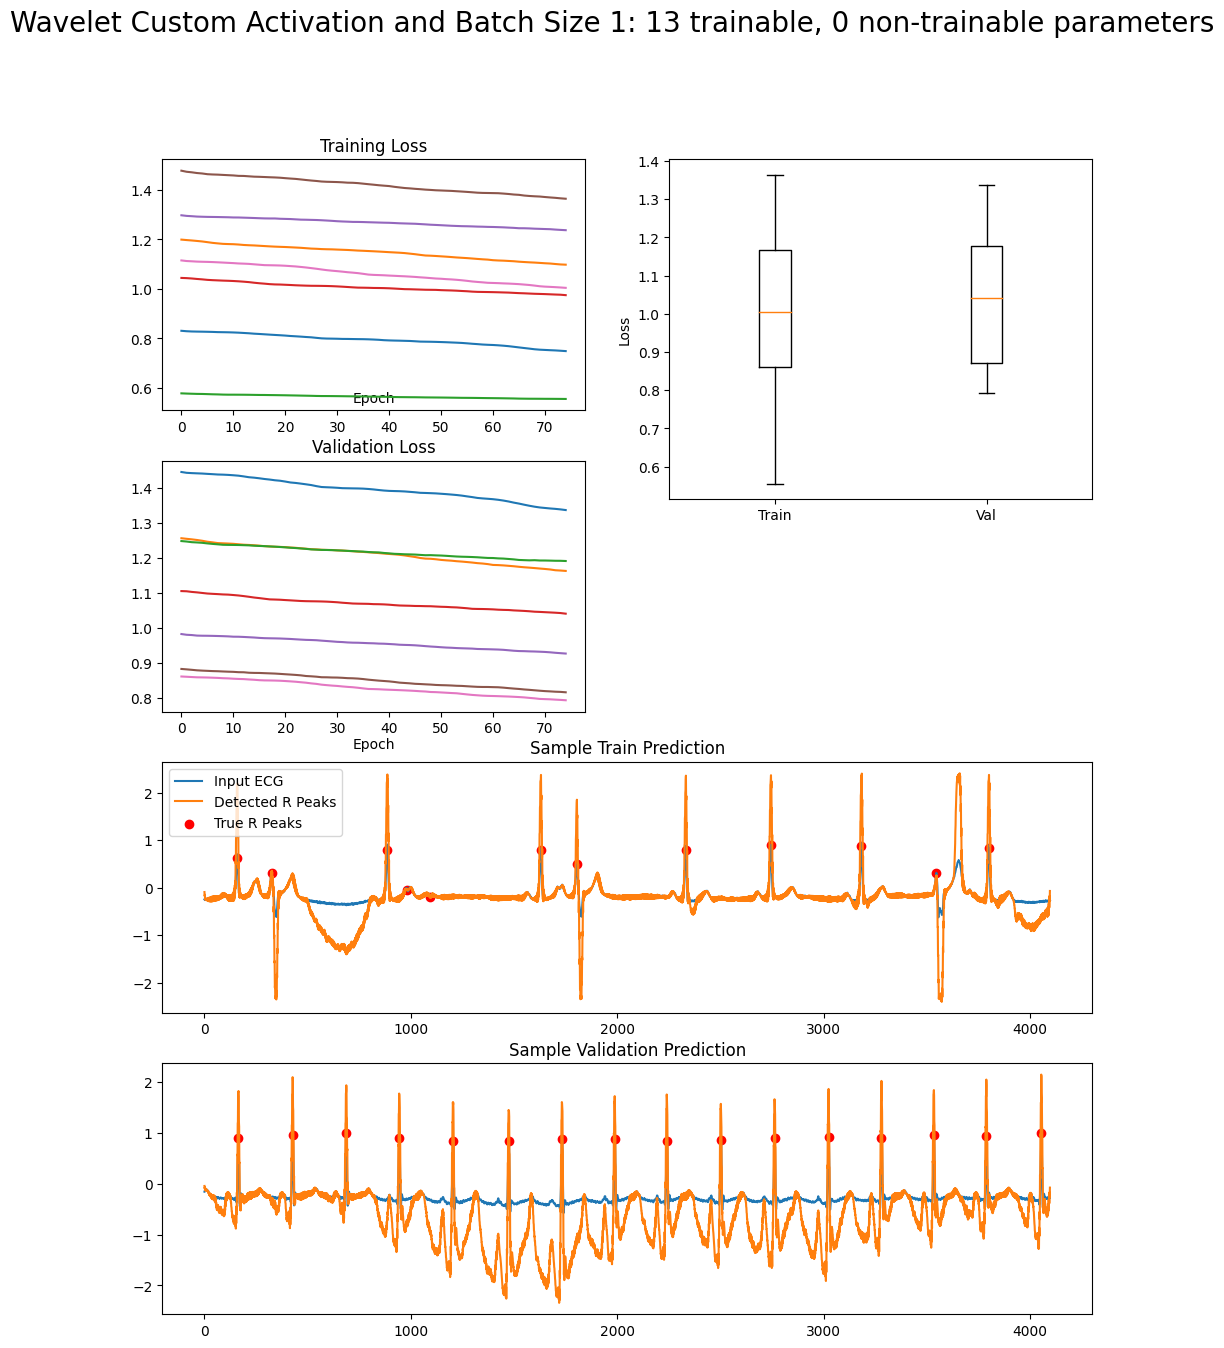

In [10]:
config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 1,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (2,1),
    "dilations" : None,
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": True,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}
config_dict["exp_name"] = "Wavelet Custom Activation and Batch Size 1"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

In [12]:
config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 1,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (1,1),
    "dilations" : None,
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": False,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}
config_dict["exp_name"] = "Wavelet Custom Activation without recon"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

: 

: 

In [ ]:
config_dict = {
    "exp_name" : None, 
    "exp_description" : None,
    "batch_size" : 8,
    "width" : 4096,
    "K" : 7,
    "epochs": 75,
    "levels" : 4,
    "stride" : (2,1),
    "dilations" : None,
    "padding" : "SAME",
    "kernelInitMode" : "SharedQMF",
    "initKernels" : [0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476,0.7071067811865476,
0.7071067811865476],
"trainKernels" : True,
"performReconstruction": False,
"activationLayer" : novel_activations.TripleLinearAct,
"activationLayerParams" : [0.5, True]
}
config_dict["exp_name"] = "Wavelet Custom Activation without recon batch 8"
config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

In [ ]:
for i in range(2,10): 
    config_dict = {
        "exp_name" : None, 
        "exp_description" : None,
        "batch_size" : 8,
        "width" : 4096,
        "K" : 7,
        "epochs": 75,
        "levels" : i,
        "stride" : (2,1),
        "dilations" : None,
        "padding" : "SAME",
        "kernelInitMode" : "SharedQMF",
        "initKernels" : [0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476],
    "trainKernels" : True,
    "performReconstruction": True,
    "activationLayer" : novel_activations.TripleLinearAct,
    "activationLayerParams" : [0.5, True]
    }
    config_dict["exp_name"] = f"Wavelet Custom Activation {i} levels"
    config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
    testE = base_wavelet_model.Experiment()
    testE.execute_experiment(config_dict)

In [ ]:
for i in range(2,10): 
    config_dict = {
        "exp_name" : None, 
        "exp_description" : None,
        "batch_size" : 8,
        "width" : 4096,
        "K" : 7,
        "epochs": 75,
        "levels" : i,
        "stride" : (2,1),
        "dilations" : None,
        "padding" : "SAME",
        "kernelInitMode" : "SharedQMF",
        "initKernels" : [0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476,0.7071067811865476,
    0.7071067811865476],
    "trainKernels" : False,
    "performReconstruction": True,
    "activationLayer" : novel_activations.TripleLinearAct,
    "activationLayerParams" : [0.5, True]
    }
    config_dict["exp_name"] = f"Wavelet Custom Activation {i} levels untrainable kerns"
    config_dict["exp_description"] = """An implementation of a wavelet transform, using the custom TLA activation"""
    testE = base_wavelet_model.Experiment()
    testE.execute_experiment(config_dict)

===== Fold 000 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/000-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/000-model\assets


===== Fold 001 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/001-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/001-model\assets


===== Fold 002 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/002-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/002-model\assets


===== Fold 003 ======


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/003-model\assets


INFO:tensorflow:Assets written to: ./Tensorboard/Basic Wavelet With Trainable Kernels/models/003-model\assets


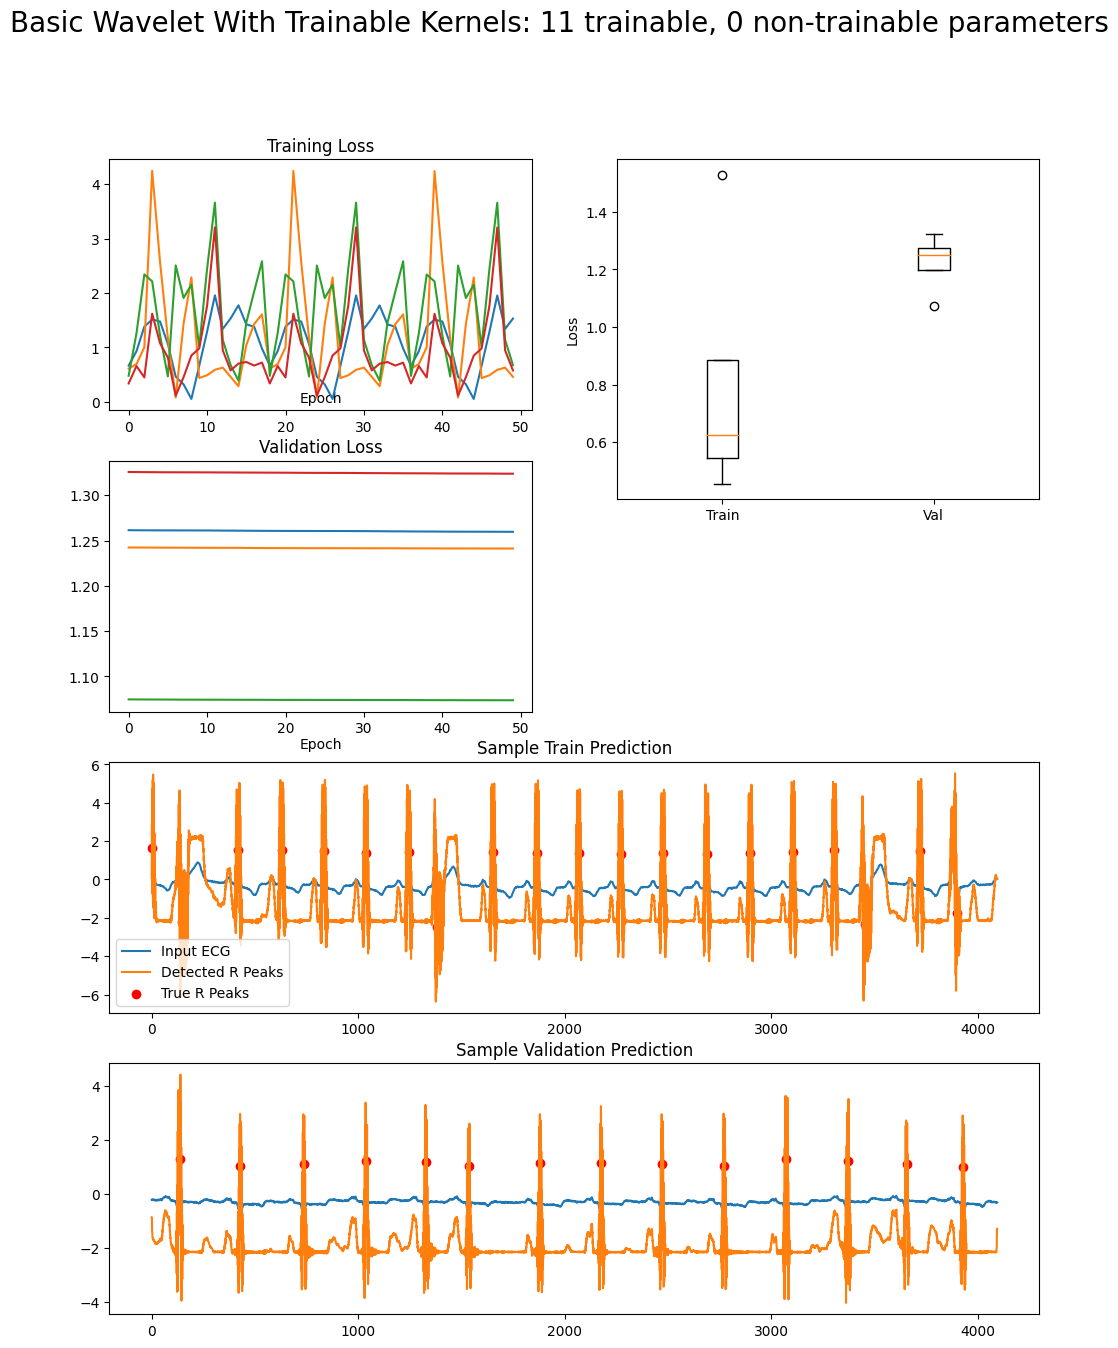

In [4]:
config_dict = base_config_dict.copy()
config_dict["exp_name"] = "Basic Wavelet With Trainable Kernels"
config_dict["exp_description"] = """Intended to be representative of a state-of the art wavelet decomposition based model 
                            for QRS complex extraction, this is a model with all the bells and whistles, except here we modify to allow the 
                            kernels to be trainable"""

config_dict["trainKernels"]=True
testE = base_wavelet_model.Experiment()
testE.execute_experiment(config_dict)

In [7]:
import hypothesis_tests
reload(hypothesis_tests)
m1=hypothesis_tests.HypothesisTest("Basic Wavelet With Trainable Kernels")
m1.test_val_means_equal("Basic Wavelet")

MannwhitneyuResult(statistic=14.0, pvalue=0.11428571428571428)

In [9]:
m1.test_more_overfitting("Basic Wavelet")

MannwhitneyuResult(statistic=3.0, pvalue=0.9428571428571427)